# Designing a Machine Learning Model

In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import GradientBoostingRegressor

# Regression

In [5]:
advertising_data = pd.read_csv('Advertising.csv', index_col=0)
advertising_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


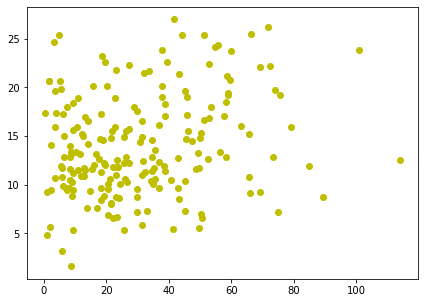

In [8]:
# Newspaper advertising
plt.figure(figsize=(7,5))
plt.scatter(advertising_data['newspaper'], advertising_data['sales'], c='y')
plt.show()

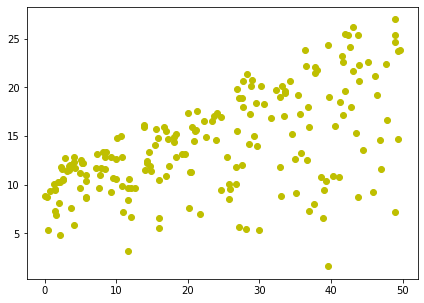

In [9]:
# Radio advertising
plt.figure(figsize=(7,5))
plt.scatter(advertising_data['radio'], advertising_data['sales'], c='y')
plt.show()

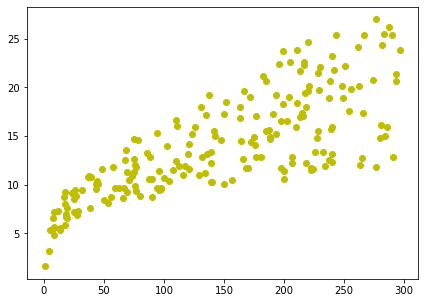

In [10]:
# TV advertising
plt.figure(figsize=(7,5))
plt.scatter(advertising_data['TV'], advertising_data['sales'], c='y')
plt.show()

In [11]:
advertising_data_correlation = advertising_data.corr()
advertising_data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


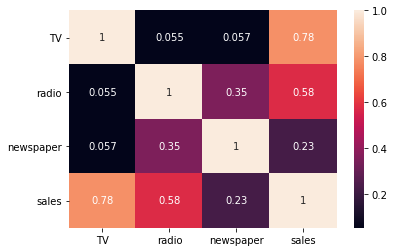

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(advertising_data_correlation, annot=True)
plt.show()

## Statsmodels regression

In [13]:
X = advertising_data['TV'].values.reshape(-1, 1)
Y = advertising_data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [14]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)
fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           4.76e-26
Time:                        12:13:03   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

## Simple Linear Regression

In [15]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)
linear_reg

LinearRegression(normalize=True)

In [16]:
print("Training_score : " , linear_reg.score(x_train, y_train))
y_pred = linear_reg.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.5552336104251212
Testing_score :  0.725606346597073


In [17]:
# Adjusted r2 only increases if it improves the model more than would be expected by chance
def adjusted_r2(r_square, labels, features):
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    return adj_r_square

In [18]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.7208754215384019


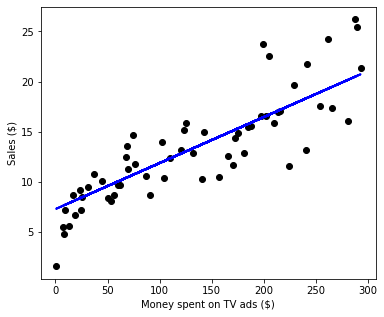

In [19]:
plt.figure(figsize=(6,5))
plt.scatter(x_test,
            y_test,
            c='black')

plt.plot(x_test,
         y_pred,
         c='blue',
         linewidth=2)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

## Multiple Linear Regression

In [20]:
X = advertising_data.drop('sales', axis=1)
Y = advertising_data['sales']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [22]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     419.0
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.74e-68
Time:                        12:13:03   Log-Likelihood:                -266.49
No. Observations:                 140   AIC:                             541.0
Df Residuals:                     136   BIC:                             552.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1681      0.359      8.817      0.0

In [23]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)
linear_reg

LinearRegression(normalize=True)

In [24]:
print("Training_score : " , linear_reg.score(x_train, y_train))

Training_score :  0.9023744820111191


In [25]:
predictors = x_train.columns

coef = pd.Series(linear_reg.coef_, predictors).sort_values()

print(coef)

newspaper   -0.000545
TV           0.043862
radio        0.196624
dtype: float64


In [26]:
y_pred = linear_reg.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Testing_score :  0.8765586053500448
Adjusted_r2_score :  0.8699456734937973


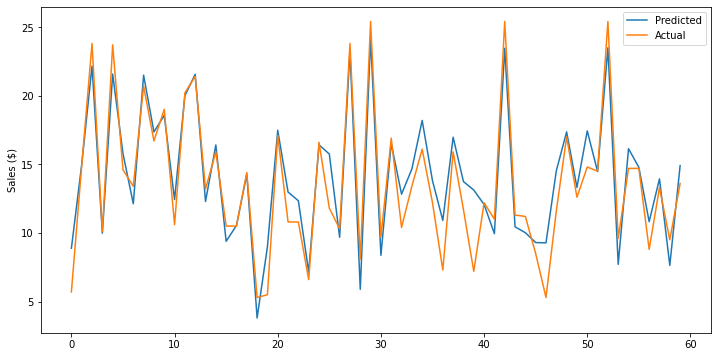

In [27]:
plt.figure(figsize = (12,6))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel("Sales ($)")
plt.legend()
plt.show()

# Classification

In [28]:
diabetes_data = pd.read_csv('PimaIndians.csv')
diabetes_data.head(2)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif


In [29]:
diabetes_data.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [30]:
# Transform the test column from strings to a label
label_encoding = preprocessing.LabelEncoder()
diabetes_data['test'] = label_encoding.fit_transform(diabetes_data['test'].astype(str))
diabetes_data.sample(2)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
371,1,149,68,29,127,29.3,0.349,42,1
279,1,88,78,29,76,32.0,0.365,29,0


In [31]:
diabetes_data["test"].value_counts()

0    262
1    130
Name: test, dtype: int64

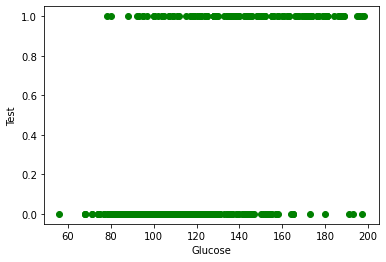

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(diabetes_data['glucose'], diabetes_data['test'], c='g')
plt.xlabel('Glucose')
plt.ylabel('Test')
plt.show()

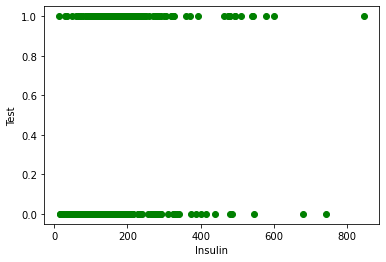

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(diabetes_data['insulin'], diabetes_data['test'], c='g')
plt.xlabel('Insulin')
plt.ylabel('Test')
plt.show()

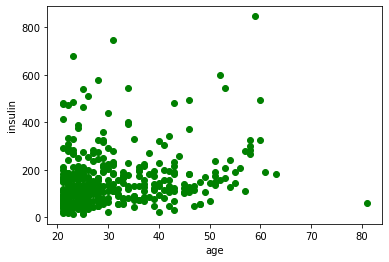

In [34]:
plt.figure(figsize=(6,4))
plt.scatter(diabetes_data['age'], diabetes_data['insulin'], c='g')
plt.xlabel('age')
plt.ylabel('insulin')
plt.show()

In [35]:
diabetes_data_correlation = diabetes_data.corr()
diabetes_data_correlation

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
pregnant,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
diastolic,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
triceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
diabetes,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
test,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


<AxesSubplot:>

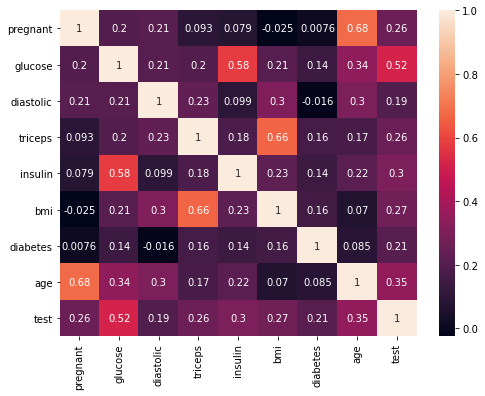

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(diabetes_data_correlation, annot=True)

In [37]:
features = diabetes_data.drop('test', axis=1)

In [38]:
standard_scaler = preprocessing.StandardScaler()
features_scaled = standard_scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
diabetes_data = pd.concat([features_scaled_df, diabetes_data['test']], axis=1).reset_index(drop=True)
diabetes_data.head(2)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1


In [39]:
X = diabetes_data.drop('test', axis=1)
Y = diabetes_data['test']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Logistic Regression

In [40]:
classifier = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [41]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1])

In [42]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results.head(10)

,y_test,y_pred
295,1,0
250,0,1
240,0,0
119,0,1
144,1,0
190,0,0
347,0,0
16,0,0
324,0,0
72,1,1


In [43]:
model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

print("Accuracy of the model is {}% " .format( model_accuracy * 100))
print("Precision of the model is {}% " .format(model_precision * 100))
print("Recall of the model is {}% " .format(model_recall * 100))

Accuracy of the model is 77.11864406779661% 
Precision of the model is 65.625% 
Recall of the model is 56.75675675675676% 


In [44]:
diabetes_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
diabetes_crosstab

y_test,0,1
y_pred,,
0,70,16
1,11,21


## Decision Tree

In [45]:
classifier2 = DecisionTreeClassifier(max_depth=4)
classifier2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [46]:
classifier2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [47]:
y_pred2 = classifier2.predict(x_test)

In [48]:
model_accuracy = accuracy_score(y_test, y_pred2)
model_precision = precision_score(y_test, y_pred2)
model_recall = recall_score(y_test, y_pred2)

print("Accuracy of the model is {}% " .format( model_accuracy * 100))
print("Precision of the model is {}% " .format(model_precision * 100))
print("Recall of the model is {}% " .format(model_recall * 100))

Accuracy of the model is 77.96610169491525% 
Precision of the model is 66.66666666666666% 
Recall of the model is 59.45945945945946% 


In [49]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred2': y_pred2})
pred_results.head(10)

,y_test,y_pred2
295,1,0
250,0,1
240,0,0
119,0,0
144,1,1
190,0,0
347,0,0
16,0,1
324,0,0
72,1,1


In [50]:
diabetes_crosstab = pd.crosstab(pred_results.y_pred2, pred_results.y_test)
diabetes_crosstab

y_test,0,1
y_pred2,,
0,70,15
1,11,22


# Clustering

In [51]:
drivers_data = pd.read_csv('driver_dataset.csv', sep='\t')
drivers_data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [52]:
drivers_data = drivers_data.sample(frac=1)

In [53]:
drivers_data.drop('Driver_ID', axis=1, inplace=True)

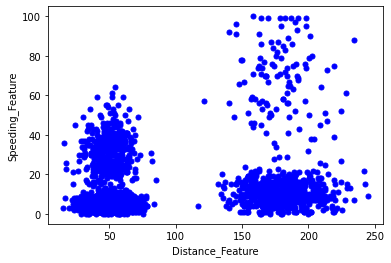

In [54]:
fig, ax = plt.subplots(figsize=(6,4))

plt.scatter(drivers_data['Distance_Feature'], 
            drivers_data['Speeding_Feature'], 
            s = 25, 
            c='blue')

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

plt.show()

In [55]:
kmeans_model = KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)
kmeans_model.labels_[::40]

array([0, 0, 3, 2, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 2, 0, 2, 3, 3, 0, 3,
       3, 3, 0, 2, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 2, 0, 2, 3, 3, 0,
       3, 2, 0, 2, 3, 2, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 2, 3, 0, 3, 3, 3,
       3, 0, 0, 0, 0, 2, 3, 0, 3, 2, 2, 3, 2, 0, 0, 3, 2, 3, 3, 2, 0, 2,
       3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 2, 2])

In [56]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3])

In [57]:
# List of tuples to show each datapoint with its cluster labels
zipped_list = list(zip(np.array(drivers_data), kmeans_model.labels_))
zipped_list[1000:1010]

[(array([199.42,   8.  ]), 2),
 (array([190.84,   1.  ]), 2),
 (array([41.91,  6.  ]), 3),
 (array([36.99,  3.  ]), 3),
 (array([34.49,  8.  ]), 3),
 (array([44.17,  6.  ]), 3),
 (array([64.47,  2.  ]), 0),
 (array([49.07,  7.  ]), 3),
 (array([151.59,   4.  ]), 2),
 (array([58.89, 42.  ]), 0)]

In [58]:
# Coordinates of the centroids
centroids = kmeans_model.cluster_centers_
centroids

array([[ 57.34222031,  10.23006311],
       [177.83509615,  70.28846154],
       [180.43486331,  10.5294964 ],
       [ 41.37278464,   7.15020576]])

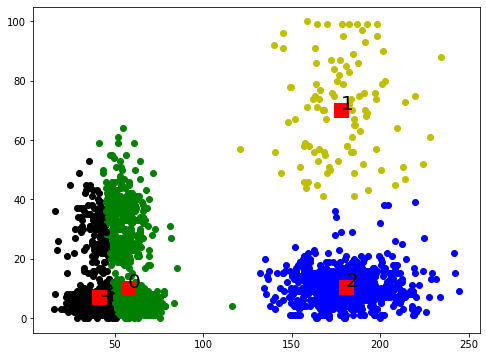

In [59]:
colors = ['g', 'y', 'b', 'k']
 
plt.figure(figsize=(8,6))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], 
                c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=20)

In [60]:
# How similar a datapoint is to others in cluster (cohesion) and how different it is to points in other clusters (separation)
print("Silhouette score: ", silhouette_score(drivers_data, kmeans_model.labels_))

Silhouette score:  0.4187729877205862


In [61]:
# kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(drivers_data)
# kmeans_model = KMeans(n_clusters=2, max_iter=1000).fit(drivers_data)

# Dimensionality Reduction

In [62]:
diabetes_data = pd.read_csv('PimaIndians_processed.csv')

In [63]:
diabetes_data.head(2)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1


## Linear Data - Principal Components Analysis

In [64]:
# Use all features except the test column. Create a function to calculate the pca and show in a dataframe
FEATURES = list(diabetes_data.columns[:-1])
def apply_pca(n):
    
    pca = PCA(n_components = n) 
    x_new = pca.fit_transform(diabetes_data[FEATURES])
        
    return pca, pd.DataFrame(x_new)

In [65]:
# Create pca object by running the function. How much of the variance in the data is explained by each of the 8 components
pca_obj, _ = apply_pca(8)
print("Explained Variance:", pca_obj.explained_variance_ratio_)

Explained Variance: [0.31994031 0.19459756 0.14984544 0.11946188 0.09002175 0.05017765
 0.03888422 0.03707119]


In [66]:
# Sum should equal one
sum(pca_obj.explained_variance_ratio_)

1.0

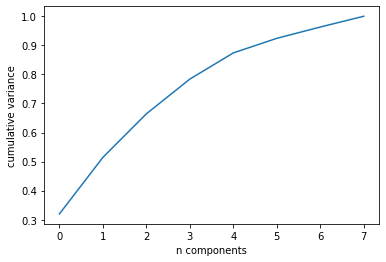

In [67]:
# Almost all the variance can be captured if you use just four of the components
plt.figure(figsize = (6,4))
plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [68]:
# Define y. Do PCA against 4 components.
Y = diabetes_data['test']
_ , X_new = apply_pca(4)
X_new.sample(5)

,0,1,2,3
224,-0.787441,-0.030685,-0.182204,-0.517953
182,-1.709739,-0.596551,-1.016625,-0.650554
267,0.000003,0.279911,-0.598733,-0.779462
70,-0.016478,0.620651,0.399134,2.548478
277,-0.146509,0.042295,0.436110,-0.191756


In [69]:
# Train and fit model using the PCA four features
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.759493670886076
0.7142857142857143
0.5357142857142857


Model has improved from the Logistic Regression on the original full dataset.

## Dimensionality Reduction with Non-Linear Data

In [70]:
X, color = datasets.make_swiss_roll(n_samples = 2000)

In [71]:
print ("Shape of X : ", X.shape)
print ("Shape of color : ", color.shape)

Shape of X :  (2000, 3)
Shape of color :  (2000,)


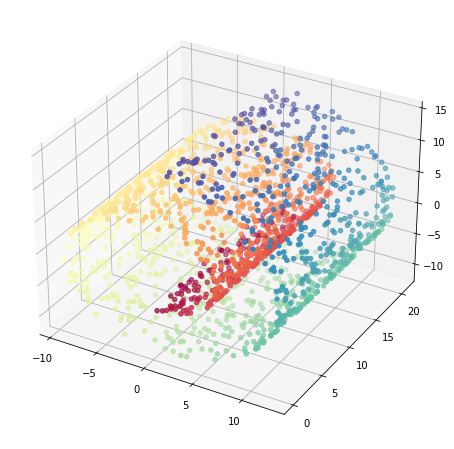

In [72]:
X = pd.DataFrame(X)
ax = plt.subplots(figsize=(12, 8))
ax = plt.axes(projection ='3d')
ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.Spectral);

In [73]:
# Reduce dimensions of the data

def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    
    X = pd.DataFrame(X)
    
    plt.subplots(figsize = (8,4))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.Spectral)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

* n_components : Number of dimensions in which to immerse the dissimilarities.
* metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
* embedding_ :Stores the position of the dataset in the embedding space.
* stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).


New shape of X :  (2000, 2)


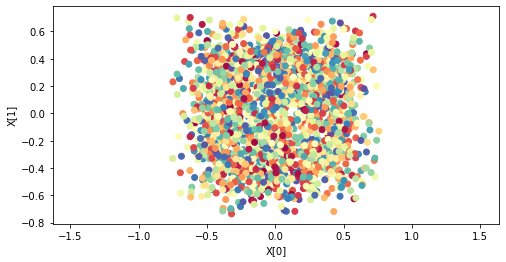

In [74]:
# Multidimensional scale - reduces dimensionality while preserving distances between the points. N components set to 2 dimensions
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (2000, 2)


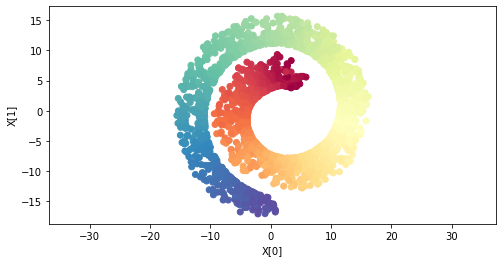

In [75]:
# Try metric equal to true to see if it performs better
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

## LLE

* n_neighbors :number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’
    * standard : use the standard locally linear embedding algorithm. 

    * hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2 

    * modified : use the modified locally linear embedding algorithm.
    * ltsa : use local tangent space alignment algorithm
* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (2000, 2)


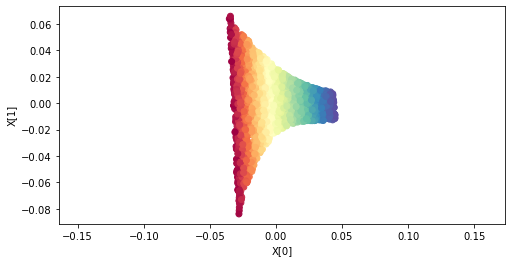

In [76]:
# Measures how each instance relates to its closest neighbours and tries to find lower dimensionality which preserves these
# relationships. Uses K nearest neighbours
lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15, 
                                                        n_components = 2, 
                                                        method = 'standard') ) 

## HLE

* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (2000, 2)


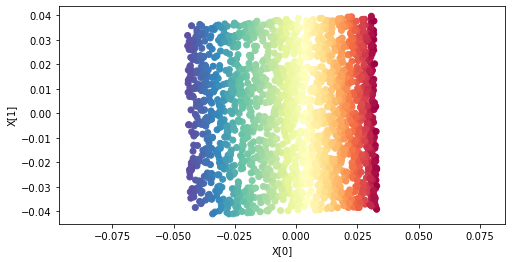

In [77]:
# Can give better results. Eliminates distortion in standard LLE
hlle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15, 
                                                         n_components = 2, 
                                                         method = 'hessian'))

# Ensemble Learning

## Voting Classifier

In [78]:
diabetes_data = pd.read_csv('PimaIndians_processed.csv')
X = diabetes_data.drop('test', axis=1)
Y = diabetes_data['test']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [79]:
log_clf = LogisticRegression(C=1, solver='liblinear')
svc_clf = SVC(C=1, kernel='linear', gamma='auto')
naive_clf = GaussianNB()

### Hard Voting

The majority vote of the individual algorithms

In [80]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf), 
                                               ('naive', naive_clf)],
                                   voting='hard')

In [81]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('svc', SVC(C=1, gamma='auto', kernel='linear')),
                             ('naive', GaussianNB())])

In [82]:
y_pred = voting_clf_hard.predict(x_test)

In [83]:
accuracy_score(y_test, y_pred)

0.7721518987341772

In [84]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [85]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7721518987341772
SVC 0.7721518987341772
GaussianNB 0.7974683544303798
VotingClassifier 0.7721518987341772


### Soft Voting

predict the class with the highest class probability, averaged over all the individual classifiers. All of the above classifiers are by default enabled for probability estimates except SVC.  So in SVC we have to pass one more parameter as probability=True

In [86]:
svc_clf_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)

In [87]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf_soft), 
                                               ('naive', naive_clf)],
                                   voting='soft', 
                                   weights = [0.25,0.5,0.25])

In [88]:
for clf_soft in (log_clf, svc_clf_soft, naive_clf, voting_clf_soft):
    
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7721518987341772
SVC 0.7721518987341772
GaussianNB 0.7974683544303798
VotingClassifier 0.7848101265822784


# Bagging and Pasting

In [89]:
insurance_data = pd.read_csv('insurance.csv')

In [90]:
insurance_data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [91]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
insurance_data_correlation = insurance_data.corr()
insurance_data_correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


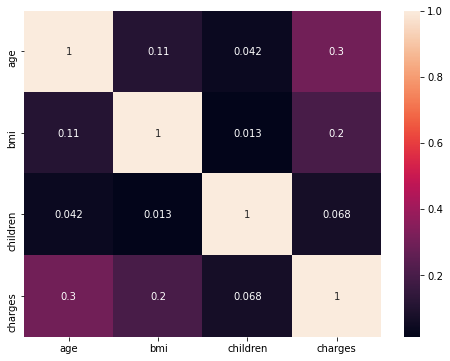

In [93]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(insurance_data_correlation, annot=True)
plt.show()

In [94]:
# Label encode the region and one-hot encode the sex and smoker columns
label_encoding = preprocessing.LabelEncoder()
insurance_data['region'] = label_encoding.fit_transform(insurance_data['region'].astype(str))
insurance_data = pd.get_dummies(insurance_data, columns=['sex',
                                                         'smoker'])

In [95]:
insurance_data.head(2)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.90,0,3,16884.9240,1,0,0,1
1,18,33.77,1,2,1725.5523,0,1,1,0


In [96]:
X = insurance_data.drop('charges', axis=1)
Y = insurance_data['charges']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Bagging Regressor

In [97]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=True,
                           max_samples=0.8,
                           n_jobs=-1,
                           oob_score=True)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [98]:
# Out of bag score
bag_reg.oob_score_

0.8419012256098908

In [99]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.8391624299992615

In [100]:
# Pasting example. Sampling without replacement 
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=False,
                           max_samples=0.9,
                           n_jobs=-1)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 max_samples=0.9, n_estimators=500, n_jobs=-1)

In [101]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.8059841946495491

# Gradient Boosting

Each regressor trains on the r

In [102]:
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(x_train, y_train)
y2 = y_train - tree_reg1.predict(x_train)

In [103]:
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg2.fit(x_train, y2)
y3 = y2 - tree_reg2.predict(x_train)

In [104]:
tree_reg3 = DecisionTreeRegressor(max_depth=3)
tree_reg3.fit(x_train, y3)

DecisionTreeRegressor(max_depth=3)

In [105]:
y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, tree_reg2, tree_reg3))
r2_score(y_test, y_pred)

0.8268034546542138

## Gradient Boosting Regressor

In [106]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, n_estimators=3)

In [107]:
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)

0.8268034546542138